In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

import sys


sys.path.append('../..')
# sys.path.append('../')

import optimneuralts
import viz_config
from utils import *


saves_path = '../saves'
%load_ext autoreload
%autoreload 2

In [16]:
experiments = [
    "50_rx_100000_combis_4_patterns_3_bs512_warmup10000_nmembers512_valnoval_ldsTrue_trainevery10_patience25_usedecay_lrplateau_nonoise",
    "DE_50_rx_100000_combis_4_patterns_3_bs512_warmup10000_nmembers32_valnoval_ldsTrue_trainevery10_patience25_usedecay_lrplateau_nonoise",
]
n_trials = 10000
n_runs = 25
metrics_dict = {}
metrics = ["jaccards", "jaccards_alls","ratio_apps_alls" , "ratio_apps", "ratio_found_pats", "ratio_found_pats_alls", "losses", "dataset_losses", "n_inter_alls", "all_flagged_risks"]

for exp in experiments:
    metrics_dict[exp] = {}
    for metric in metrics:
        metrics_dict[exp][metric] = []
        for run in range(n_runs):
            path = f"{saves_path}/{exp}/{metric}/{run}.pth"
            metrics_dict[exp][metric].append(torch.load(path))


In [3]:
colors = ["tab:orange", "tab:purple", "tab:green", "tab:red", "tab:cyan", "tab:brown"]
labels = ["Gradient-based", "DE"]
interval = 200
upper_lim = 20100
labels_fn = "_vs_".join(labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


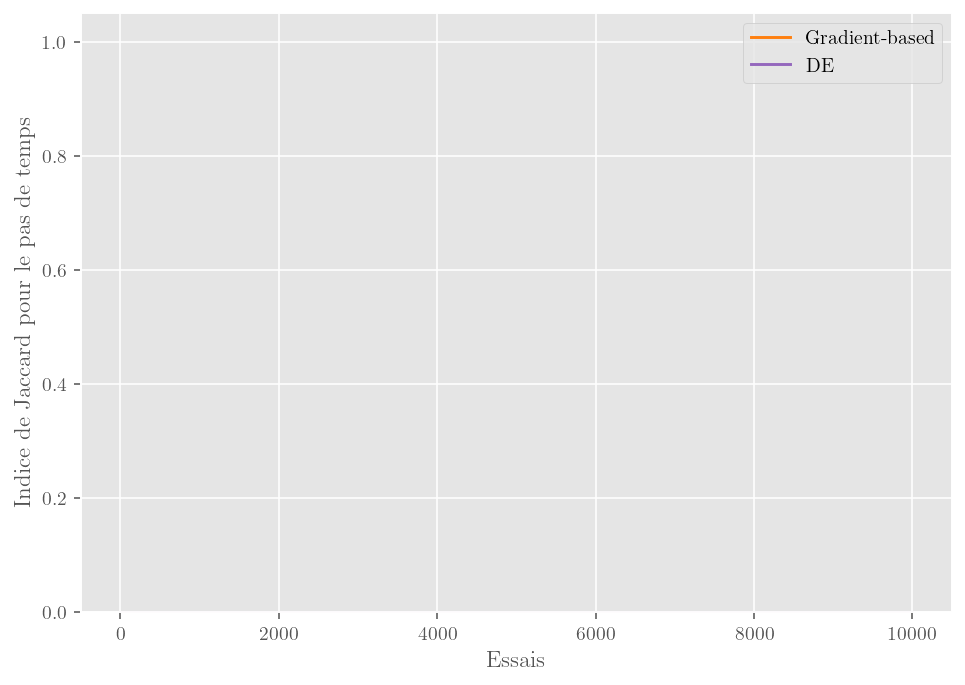

<Figure size 980x700 with 0 Axes>

In [20]:
metric = "jaccards"

for i, exp in enumerate(metrics_dict.keys()):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(
        x,
        np.clip(means - stds, 0, 1),
        np.clip(means + stds, 0, 1),
        color=colors[i],
        alpha=0.3,
    )


plt.xlabel("Essais")
plt.ylabel("Indice de Jaccard pour le pas de temps")
plt.legend()

plt.ylim(0, 1.05)

plt.tight_layout()

plt.show()


plt.savefig(f'images/polypharmacy/perf/{metric}_{labels_fn}')


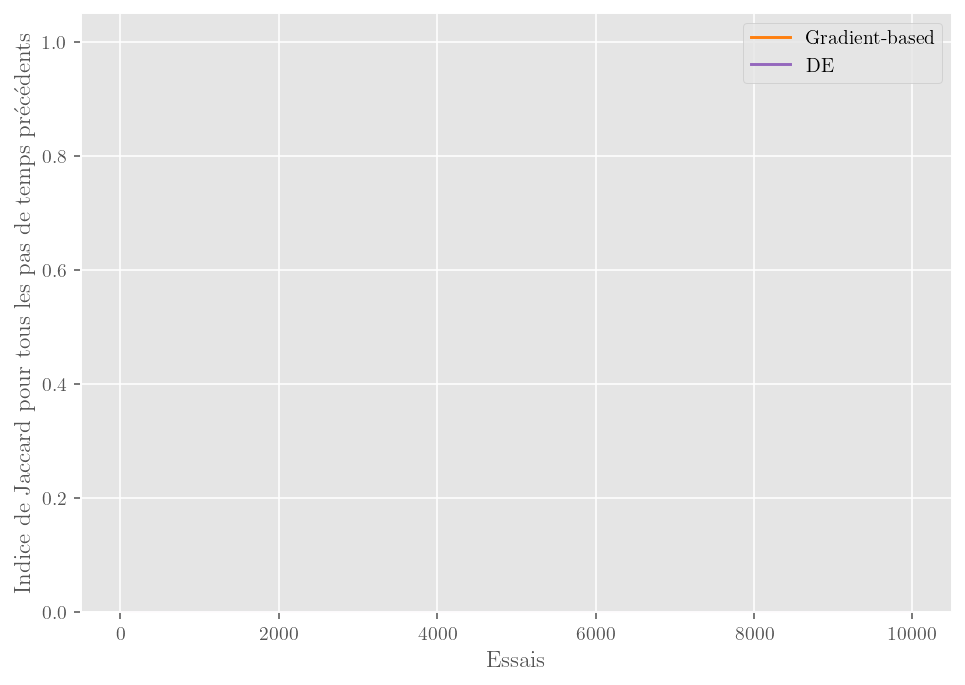

In [5]:
metric = "jaccards_alls"

for i, exp in enumerate(metrics_dict.keys()):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(
        x,
        np.clip(means - stds, 0, 1),
        np.clip(means + stds, 0, 1),
        color=colors[i],
        alpha=0.3,
    )
    plt.xlabel("Essais")
    plt.ylabel("Indice de Jaccard pour tous les pas de temps précédents")
plt.legend()

plt.ylim(0, 1.05)

plt.tight_layout()

# plt.show()
plt.savefig(f'images/polypharmacy/perf/{metric}_{labels_fn}')


/tmp/ipykernel_1357866/891501277.py:4: RuntimeWarning: Mean of empty slice
  means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
/home/quo/Documents/Maitrise/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_1357866/891501277.py:4: RuntimeWarning: Mean of empty slice
  means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
/home/quo/Documents/Maitrise/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


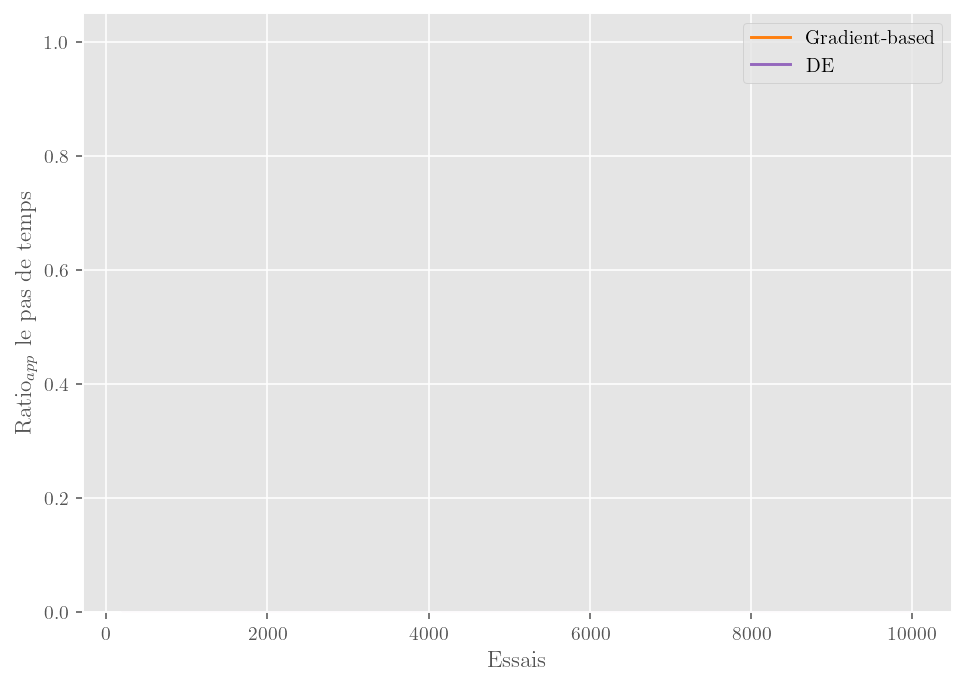

In [6]:
metric = "ratio_apps"

for i, exp in enumerate(metrics_dict.keys()):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(
        x,
        np.clip(means - stds, 0, 1),
        np.clip(means + stds, 0, 1),
        color=colors[i],
        alpha=0.3,
    )
    plt.xlabel("Essais")
    plt.ylabel("Ratio$_{app}$ le pas de temps")
plt.legend()
plt.ylim(0, 1.05)
plt.tight_layout()
# plt.show()
plt.savefig(f'images/polypharmacy/perf/{metric}_{labels_fn}')


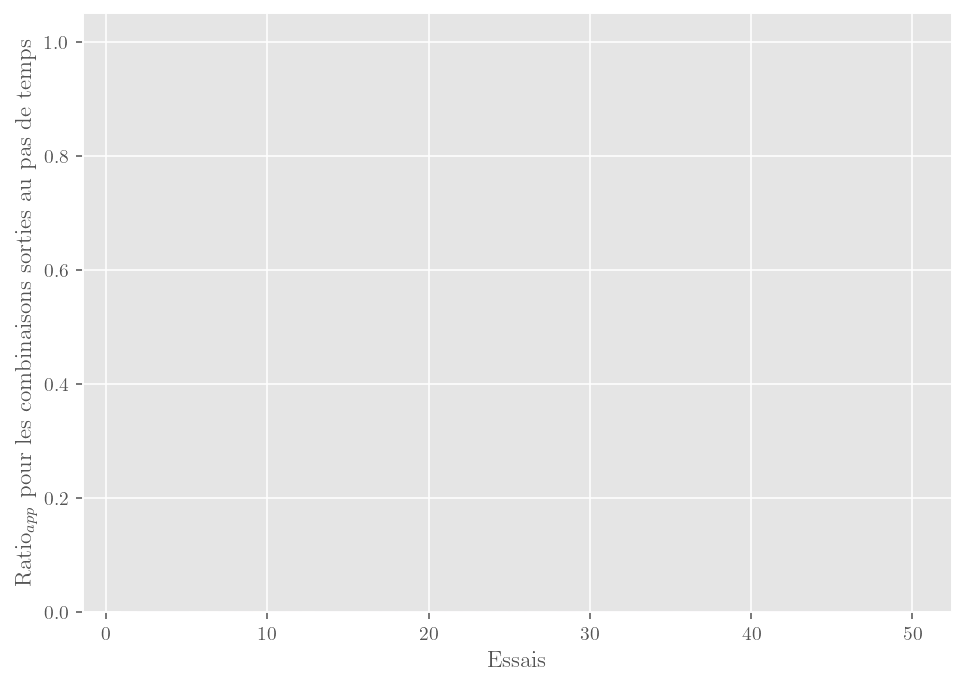

In [7]:
metric = "ratio_apps"

for i, exp in enumerate(metrics_dict.keys()):
    for j in range(25):
        # means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
        # stds = np.nanstd(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
        # x = np.arange(len(means)) * interval
        points = metrics_dict[exp][metric][j]
        plt.plot(list(range(len(points))), points, color=colors[i], alpha=0.1)
        # plt.fill_between(
        #     x,
        #     np.clip(means - stds, 0, 1),
        #     np.clip(means + stds, 0, 1),
        #     color=colors[i],
        #     alpha=0.3,
        # )
        plt.xlabel("Essais")
        plt.ylabel("Ratio$_{app}$ pour les combinaisons sorties au pas de temps")
# plt.legend()
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1357866/246225235.py:4: RuntimeWarning: Mean of empty slice
  means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
/home/quo/Documents/Maitrise/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_1357866/246225235.py:4: RuntimeWarning: Mean of empty slice
  means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
/home/quo/Documents/Maitrise/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


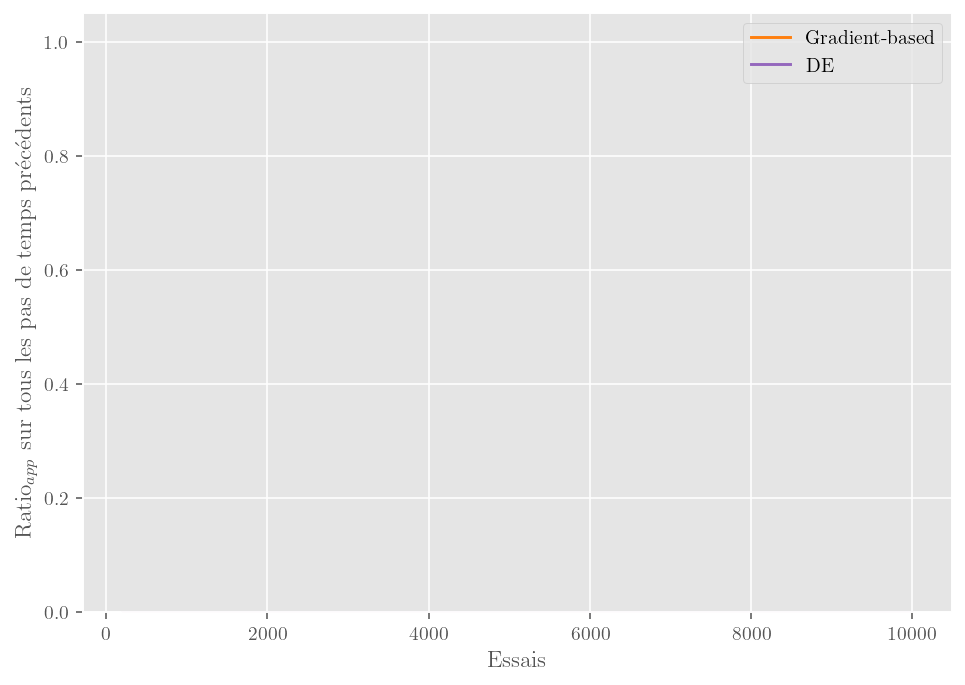

In [8]:
metric = "ratio_apps_alls"

for i, exp in enumerate(metrics_dict.keys()):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[: (upper_lim // interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(
        x,
        np.clip(means - stds, 0, 1),
        np.clip(means + stds, 0, 1),
        color=colors[i],
        alpha=0.3,
    )
    plt.xlabel("Essais")
    plt.ylabel("Ratio$_{app}$ sur tous les pas de temps précédents")
plt.legend()
plt.ylim(0, 1.05)
plt.tight_layout()
# plt.show()
plt.savefig(f'images/polypharmacy/perf/{metric}_{labels_fn}')


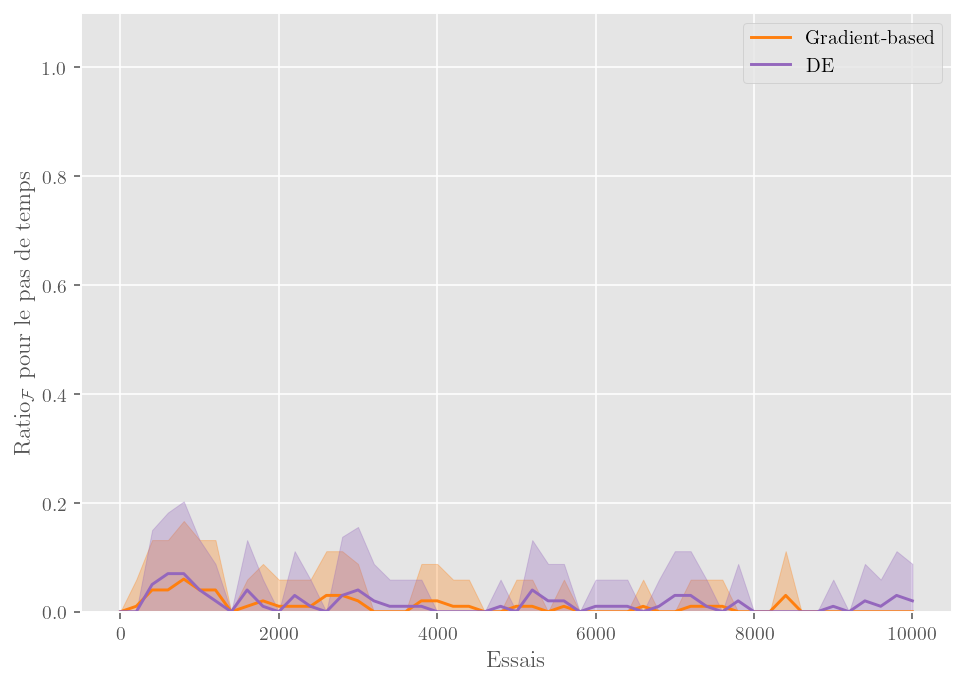

In [9]:
# Plot ratio found pat
metric = "ratio_found_pats"

for i, exp in enumerate(metrics_dict.keys()):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[:(upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[:(upper_lim// interval)]
    x = np.arange(len(means)) * interval


    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(x, np.clip(means - stds, 0, 1), np.clip(means + stds, 0, 1), color=colors[i], alpha=0.3)
plt.xlabel('Essais')
plt.ylabel("Ratio$_{\mathcal{F}}$ pour le pas de temps")
plt.legend()
plt.ylim(0, 1.1)
plt.tight_layout()

plt.savefig(f'images/polypharmacy/perf/{metric}_{labels_fn}')



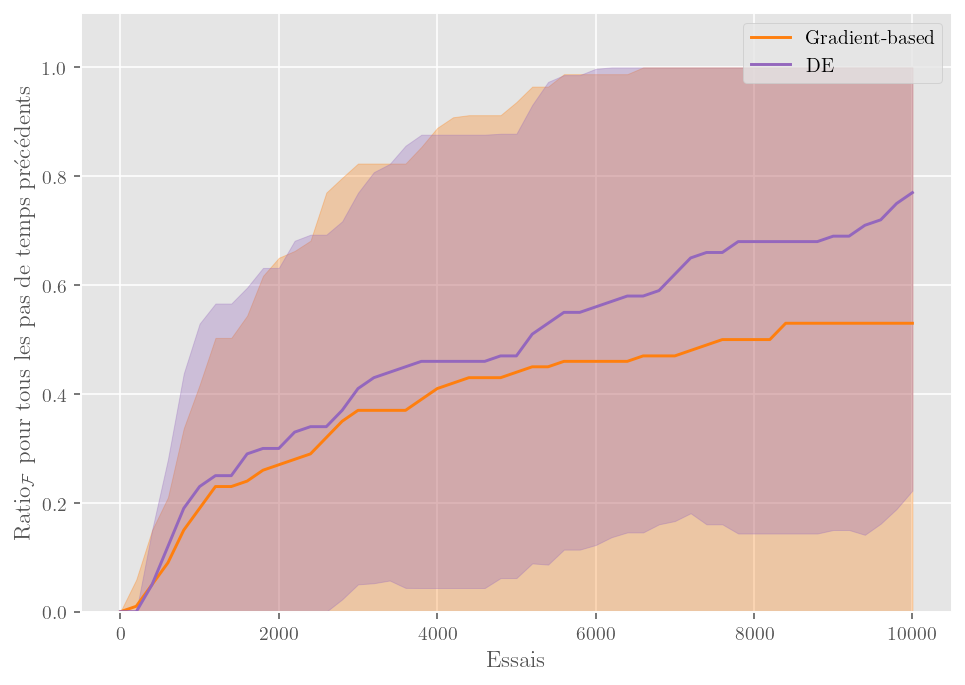

In [10]:
# Plot ratio found pat
metric = "ratio_found_pats_alls"

for i, exp in enumerate(metrics_dict.keys()):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[:(upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[:(upper_lim// interval)]
    x = np.arange(len(means)) * interval


    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(x, np.clip(means - stds, 0, 1), np.clip(means + stds, 0, 1), color=colors[i], alpha=0.3)
plt.ylabel("Ratio$_{\mathcal{F}}$ pour tous les pas de temps précédents")
plt.xlabel('Essais')
plt.legend()
plt.ylim(0, 1.1)
plt.tight_layout()


plt.savefig(f'images/polypharmacy/perf/{metric}_{labels_fn}')



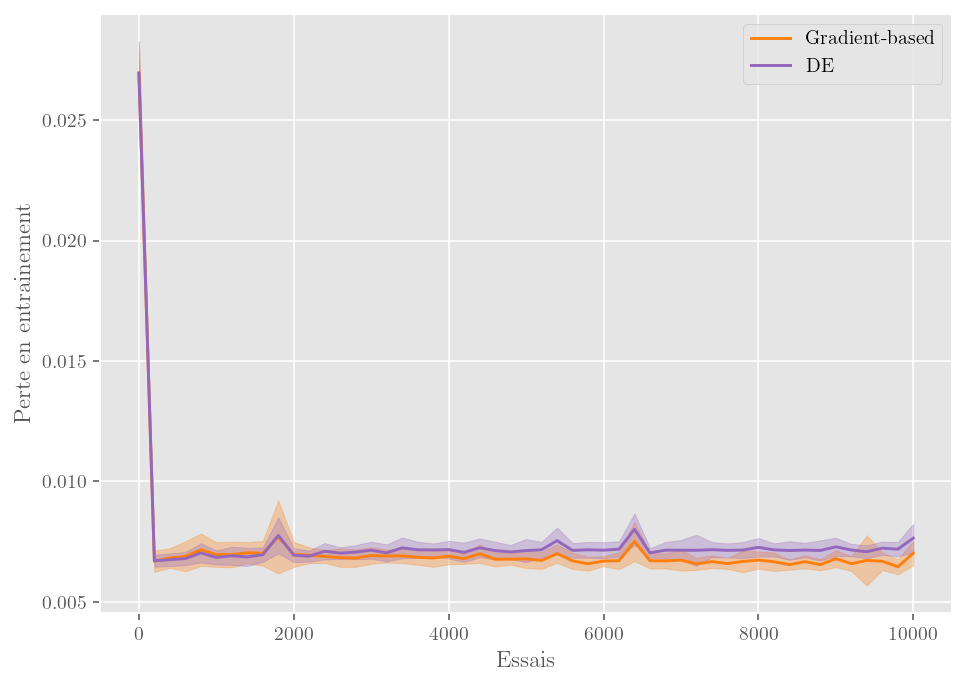

In [11]:
# Plot ratio found pat
metric = "losses"
for i, exp in enumerate(experiments):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[:(upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[:(upper_lim// interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(x, means - stds, means + stds, color=colors[i], alpha=0.3)
plt.xlabel('Essais')
plt.ylabel("Perte en entrainement")
plt.legend()
plt.tight_layout()

plt.savefig(f'images/polypharmacy/perf/{metric}_{labels_fn}')


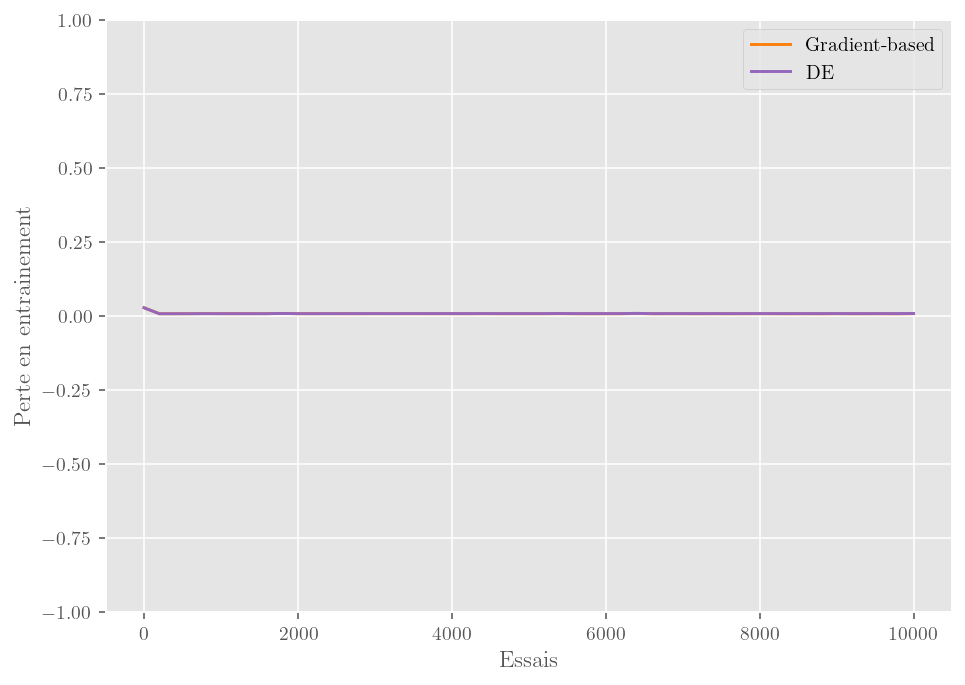

In [12]:
metric = "losses"
for i, exp in enumerate(experiments):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[:(upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[:(upper_lim// interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(x, means - stds, means + stds, color=colors[i], alpha=0.3)
plt.xlabel('Essais')
plt.ylabel("Perte en entrainement")
plt.legend()
plt.ylim(-1, 1)
plt.tight_layout()
# plt.savefig(f'images/polypharmacy/perf/{metric}_{labels_fn}')


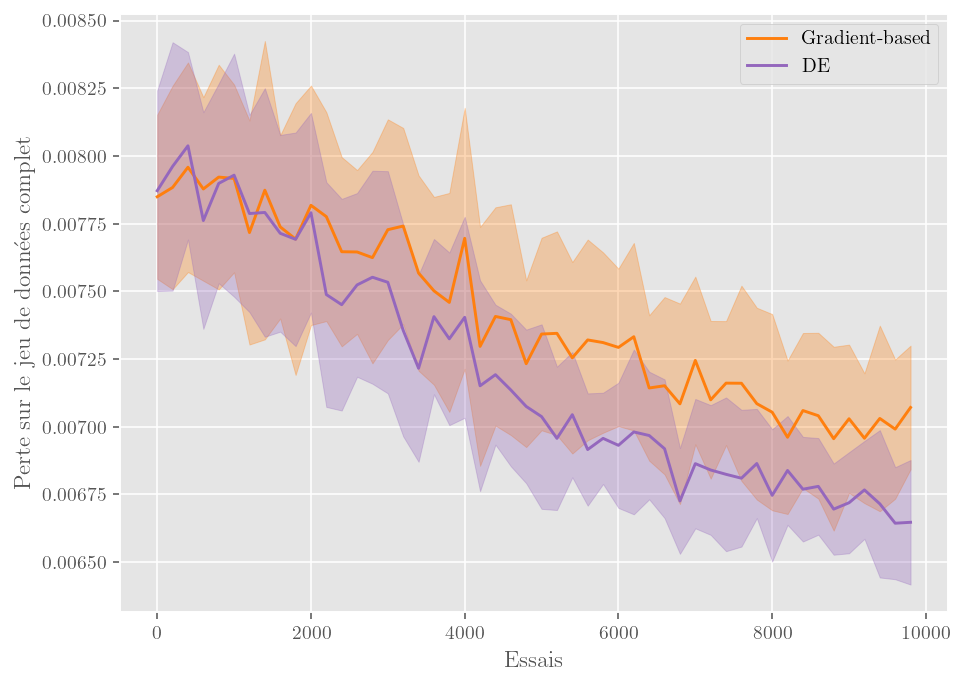

In [13]:
# Plot ratio found pat
metric = "dataset_losses"

for i, exp in enumerate(experiments):
    means = np.nanmean(metrics_dict[exp][metric], axis=0)[:(upper_lim // interval)]
    stds = np.nanstd(metrics_dict[exp][metric], axis=0)[:(upper_lim// interval)]
    x = np.arange(len(means)) * interval

    plt.plot(x, means, color=colors[i], label=labels[i])
    plt.fill_between(x, means - stds, means + stds, color=colors[i], alpha=0.3)
plt.xlabel('Essais')
plt.ylabel("Perte sur le jeu de données complet")
plt.legend()
plt.tight_layout()
plt.savefig(f'images/polypharmacy/perf/{metric}_{labels_fn}')


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


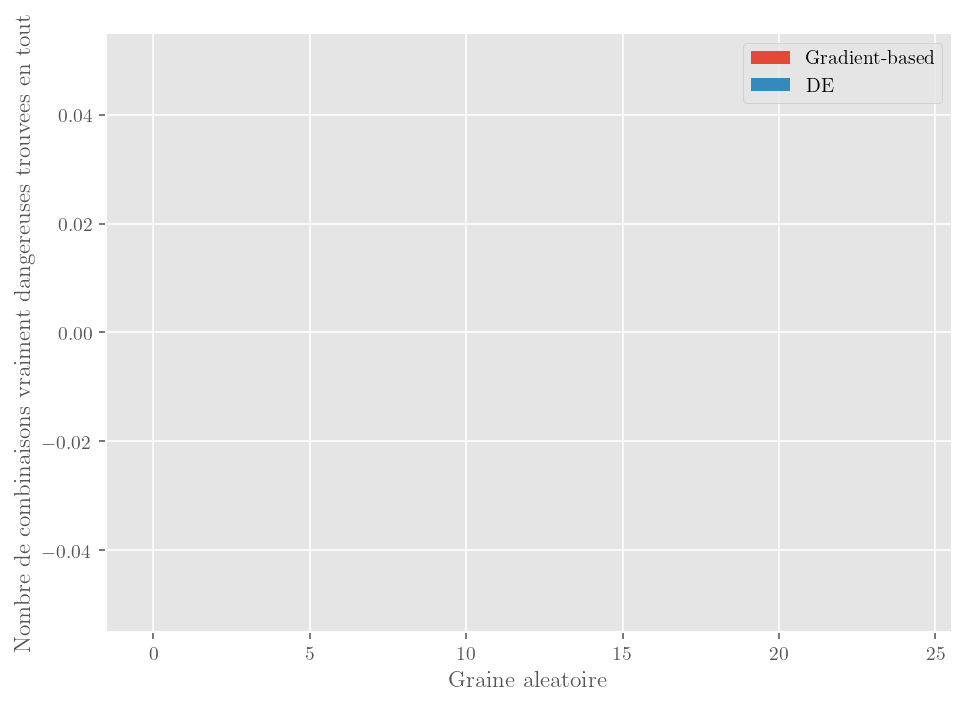

In [14]:
# Plot ratio found pat
metric = "n_inter_alls"

for i, exp in enumerate(experiments):
    n_inters = []
    for j in range(25):
        n_inters.append(metrics_dict[exp][metric][j][-1])

    seeds = np.arange(len(n_inters))
    print(n_inters)
    if i % 2 == 0:
        plt.bar(seeds - 0.2, n_inters, width=0.2, label=labels[i])
    else:
        plt.bar(seeds + 0.2, n_inters, width=0.2,label=labels[i])
plt.xlabel('Graine aleatoire')
plt.ylabel("Nombre de combinaisons vraiment dangereuses trouvees en tout")
plt.legend()
plt.tight_layout()
plt.savefig(f'images/polypharmacy/perf/{metric}_{labels_fn}')


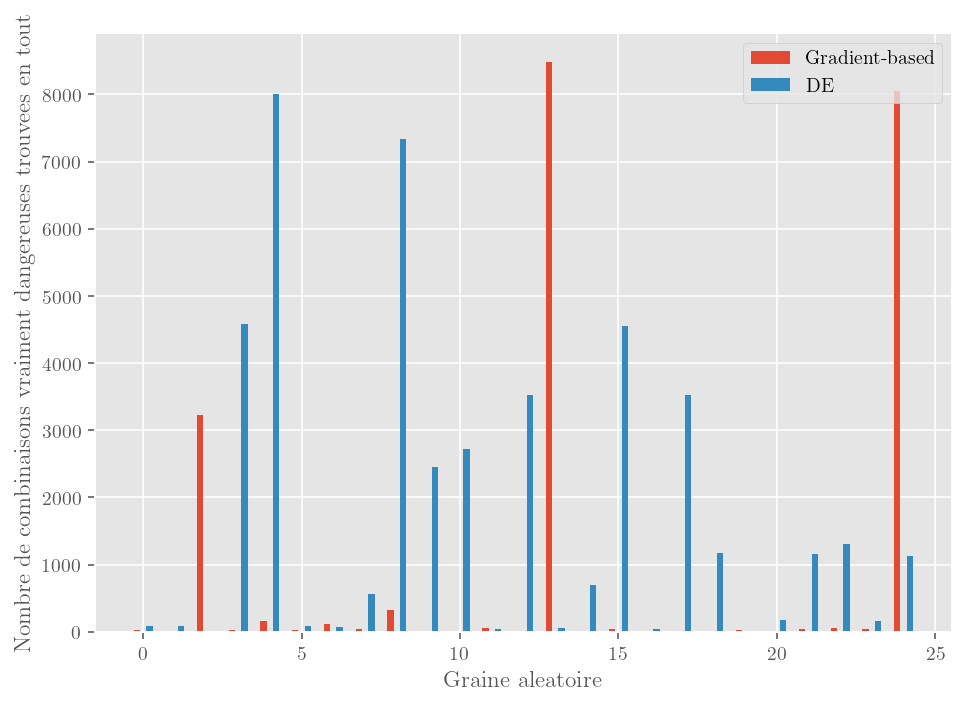

In [25]:
# Plot ratio found pat
metric = "all_flagged_risks"

for i, exp in enumerate(experiments):
    n_flagged_below_thresh = []
    for j in range(25):
        n_flagged_below_thresh.append(sum(metrics_dict[exp][metric][j] < 1.1))

    seeds = np.arange(len(n_flagged_below_thresh))
    if i % 2 == 0:
        plt.bar(seeds - 0.2, n_flagged_below_thresh, width=0.2, label=labels[i])
    else:
        plt.bar(seeds + 0.2, n_flagged_below_thresh, width=0.2,label=labels[i])
plt.xlabel('Graine aleatoire')
plt.ylabel("Nombre de combinaisons vraiment dangereuses trouvees en tout")
plt.legend()
plt.tight_layout()
plt.savefig(f'images/polypharmacy/perf/{metric}_{labels_fn}')